<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [1]:
#Write code here
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [2]:
# Load the data
import pandas as pd

data = pd.read_csv('HR_comma_sep.csv')
df = data.copy()


In [3]:
# Find the shape
print("Shape of the data:", df.shape)


Shape of the data: (14999, 10)


In [4]:
# Display the top 5 rows.
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Find the data types of columns
print("Data types:\n", df.dtypes)


Data types:
 satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object


In [6]:
# Find the basic statistics
print("Basic Statistics:\n", df.describe())


Basic Statistics:
        satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.0

In [7]:
# Find the null values
print("Null values:\n", df.isnull().sum())


Null values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64


# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Find out the how many employees left the company?**

In [8]:
# Count of how many employees left the company
# Load the CSV file
csv_path = 'HR_comma_sep.csv'  
data = pd.read_csv(csv_path)

# Count the number of employees who left the company
employees_left = data[data['left'] == 1].shape[0]

print(f"Number of employees who left the company: {employees_left}")


Number of employees who left the company: 3571


**Task 3: Find out the number of projects being handled.**

In [10]:
# Write code here
num_projects = data['number_project'].nunique()
print(f"Number of unique projects being handled: {num_projects}")

Number of unique projects being handled: 6


**Question: What insights can you infer from the above plot?**

**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>

In [9]:
# Group the data by number_of_projects and calculate the turnover rate
turnover_rate = data.groupby('number_project')['left'].mean().reset_index()
turnover_rate


,number_project,left
0,2,0.656198
1,3,0.017756
2,4,0.093700
3,5,0.221659
4,6,0.557922
5,7,1.000000


**Task 5:** Make a plot of your findings (only turn-over employees)

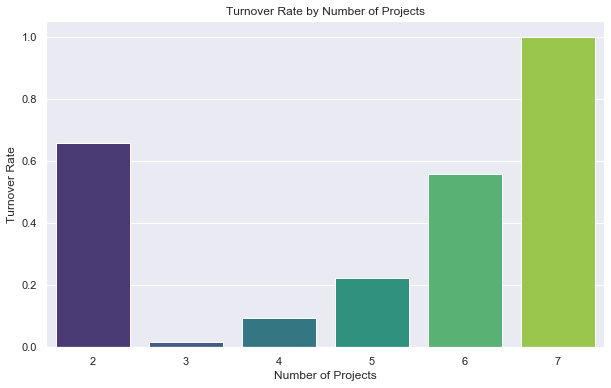

In [12]:
# Plot the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='number_project', y='left', data=turnover_rate, palette='viridis')
plt.xlabel('Number of Projects')
plt.ylabel('Turnover Rate')
plt.title('Turnover Rate by Number of Projects')
plt.show()

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer: Employees with either a very high or very low number of projects are more likely to leave the company, likely due to burnout and feeling underutilized, respectively. Maintaining a balanced workload can help improve employee retention

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

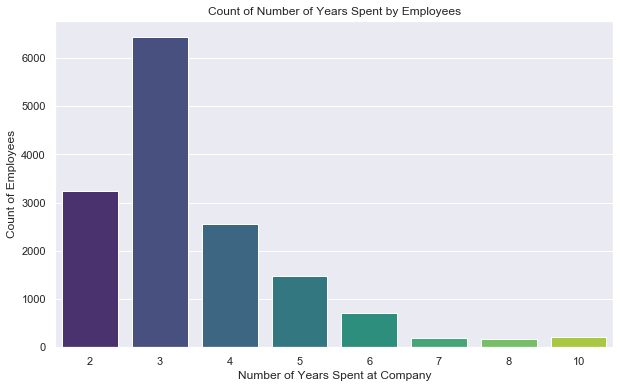

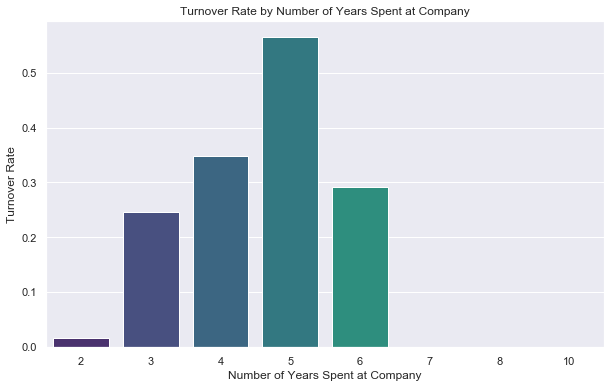

In [10]:
# Show the plot for the count of years here
# Plot the count of number of years spent by employees
plt.figure(figsize=(10, 6))
sns.countplot(x='time_spend_company', data=data, palette='viridis')
plt.xlabel('Number of Years Spent at Company')
plt.ylabel('Count of Employees')
plt.title('Count of Number of Years Spent by Employees')
plt.show()

# Grouping the data by time_spend_company and calculate the turnover rate
turnover_rate_years = data.groupby('time_spend_company')['left'].mean().reset_index()

# Ploting the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='time_spend_company', y='left', data=turnover_rate_years, palette='viridis')
plt.xlabel('Number of Years Spent at Company')
plt.ylabel('Turnover Rate')
plt.title('Turnover Rate by Number of Years Spent at Company')
plt.show()


**Question: What is the maximum number of time spend by the employees?**

Answer: Maximum 10 years

The maximum number of years spent by employees is: 10


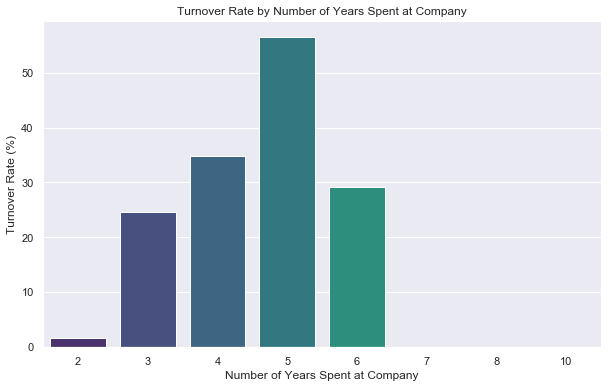

In [11]:

# Finding the maximum number of years spent by employees
max_years = data['time_spend_company'].max()
print(f"The maximum number of years spent by employees is: {max_years}")

# Calculating the turnover rate for each number of years spent at the company
turnover_rate_years = data.groupby('time_spend_company')['left'].mean().reset_index()
turnover_rate_years['turnover_rate'] = turnover_rate_years['left'] * 100
#ploting
plt.figure(figsize=(10, 6))
sns.barplot(x='time_spend_company', y='turnover_rate', data=turnover_rate_years, palette='viridis')
plt.xlabel('Number of Years Spent at Company')
plt.ylabel('Turnover Rate (%)')
plt.title('Turnover Rate by Number of Years Spent at Company')
plt.show()


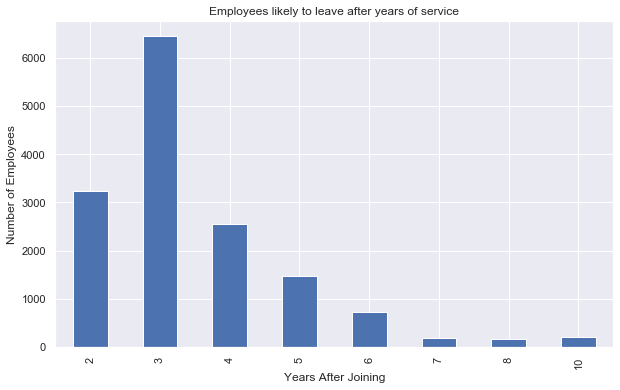

In [12]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
yearly_leave_counts = df.groupby('time_spend_company').size()

# Plotting the bar plot
yearly_leave_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Employees likely to leave after years of service')
plt.xlabel('Years After Joining')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

**Question: After what time period are employees most likely to leave the company ?**

Answer:3 years

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

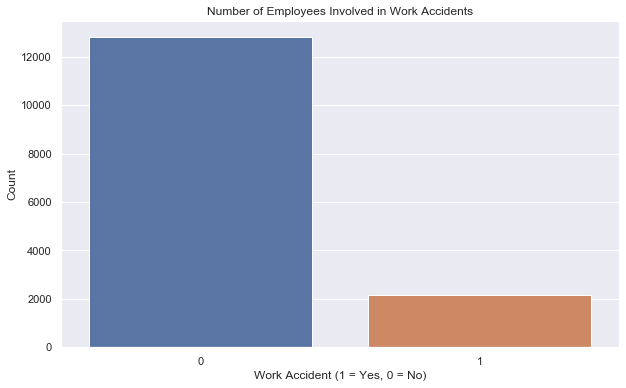

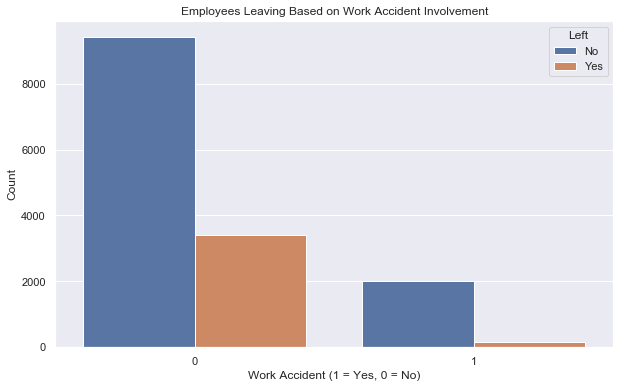

In [13]:
# Count plot for employees involved in work accidents
plt.figure(figsize=(10, 6))
sns.countplot(x='Work_accident', data=df)
plt.title('Number of Employees Involved in Work Accidents')
plt.xlabel('Work Accident (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Count plot for employees who left based on work accident involvement
plt.figure(figsize=(10, 6))
sns.countplot(x='Work_accident', hue='left', data=df)
plt.title('Employees Leaving Based on Work Accident Involvement')
plt.xlabel('Work Accident (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Left', labels=['No', 'Yes'])
plt.show()

**Question: What can you conclude from the graph above?**

# Number of employees involved in work accident and left or not left
There are more people who left the company who dont face work accident and many of them who face work accident still working in the compant

## **Promotions in last 5 years**

**Task 8: How many number of employees got the promotion in last 5 year and how many of them left?**

In [16]:
# Write code here
# Filtering employees involved in work accidents
employees_with_accident = df[df['Work_accident'] == 1]

# Counting employees who left or not among those involved in accidents
left_counts = employees_with_accident['left'].value_counts()

print("Number of employees involved in work accident and left or not left:")
print(left_counts)

Number of employees involved in work accident and left or not left:
0    2000
1     169
Name: left, dtype: int64


## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

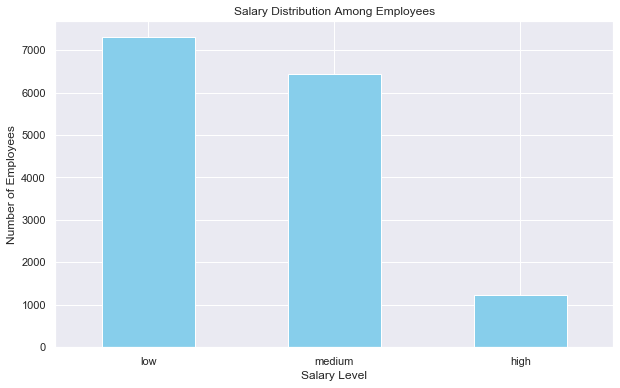

In [17]:
#Write code here
salary_counts = df['salary'].value_counts()

# Plotting the salary distribution
plt.figure(figsize=(10, 6))
salary_counts.plot(kind='bar', color='skyblue')
plt.title('Salary Distribution Among Employees')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

In [18]:
# Write code here
# Calculating percentage of employees who left by salary level
salary_left_pct = df.groupby('salary')['left'].mean() * 100

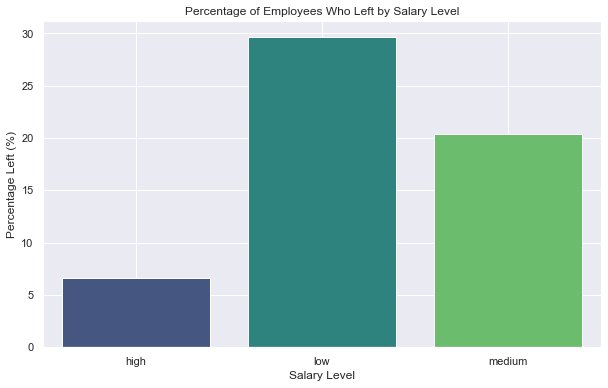

In [19]:
# Write code here for plot
plt.figure(figsize=(10, 6))
sns.barplot(x=salary_left_pct.index, y=salary_left_pct.values, palette='viridis')
plt.title('Percentage of Employees Who Left by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Percentage Left (%)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

**Question: What does the above plot show?**

## **Employees per Department**

**Task 10: Find out employees per department and also see which which department has highest number of employees leaving the company.**

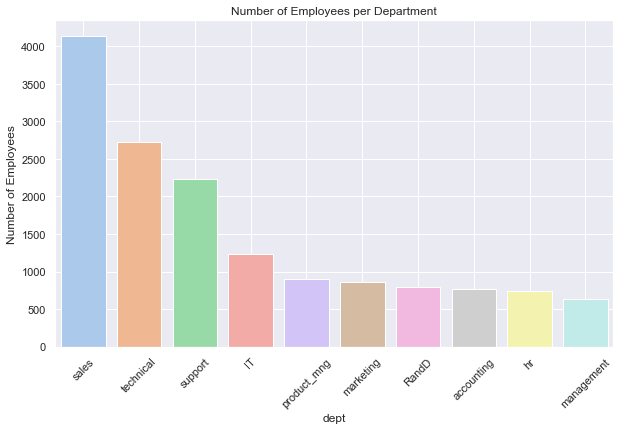


Department with the highest number of employees leaving: sales


In [21]:

# Counting employees per department
employee_count_per_dept = df['dept'].value_counts()

# Plotting employee count per department
plt.figure(figsize=(10, 6))
sns.barplot(x=employee_count_per_dept.index, y=employee_count_per_dept.values, palette='pastel')
plt.title('Number of Employees per Department')
plt.xlabel('dept')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Identifying department with highest number of employees leaving
dept_with_most_leaving = df[df['left'] == 1]['dept'].value_counts().idxmax()

print(f"\nDepartment with the highest number of employees leaving: {dept_with_most_leaving}")


**Question: Which department has maximum number of employees?**

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

In [22]:
# Write code here
# Calculating percentage of employees who left by department
dept_turnover_pct = df.groupby('dept')['left'].mean() * 100

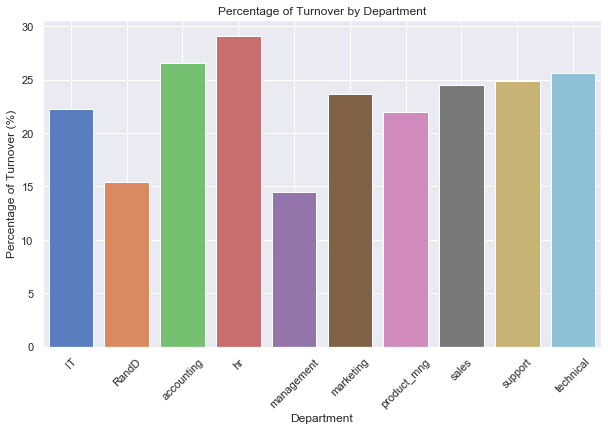

In [23]:
# Write code here to draw the plot
# Plotting the percentage of turnover by department
plt.figure(figsize=(10, 6))
sns.barplot(x=dept_turnover_pct.index, y=dept_turnover_pct.values, palette='muted')
plt.title('Percentage of Turnover by Department')
plt.xlabel('Department')
plt.ylabel('Percentage of Turnover (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Answer: 

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

C:\Users\Tech sign\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
C:\Users\Tech sign\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  if __name__ == '__main__':


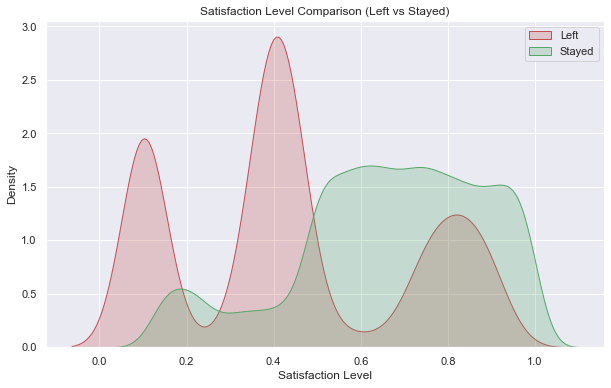

In [24]:
# Write the code here
# Separate data for employees who left and who didn't leave
left_df = df[df['left'] == 1]
stay_df = df[df['left'] == 0]

# Plotting KDE plot for satisfaction level
plt.figure(figsize=(10, 6))
sns.kdeplot(left_df['satisfaction_level'], label='Left', shade=True, color='r')
sns.kdeplot(stay_df['satisfaction_level'], label='Stayed', shade=True, color='g')
plt.title('Satisfaction Level Comparison (Left vs Stayed)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [25]:
# Write the code here to make bins as mentioned above
# Creating a new column 'satisfaction_level_type' based on conditions
df['satisfaction_level_type'] = df['satisfaction_level'].apply(lambda x: 'High' if x >= 0.5 else 'Low')

# Displaying the first few rows to verify
print(df[['satisfaction_level', 'satisfaction_level_type']].head())

   satisfaction_level satisfaction_level_type
0                0.38                     Low
1                0.80                    High
2                0.11                     Low
3                0.72                    High
4                0.37                     Low


**Task 13: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

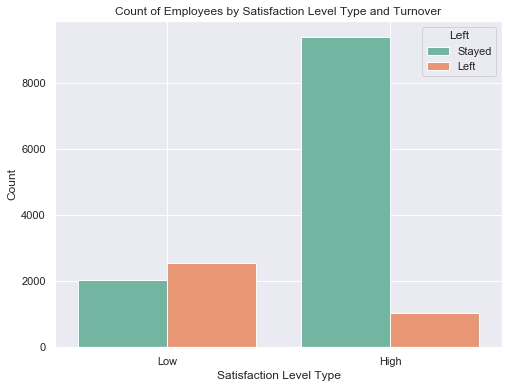

In [26]:
# Write Code Here
# Createing 'satisfaction_level_type' based on conditions
df['satisfaction_level_type'] = df['satisfaction_level'].apply(lambda x: 'High' if x >= 0.5 else 'Low')

# Plotting count plot with hue for turnover
plt.figure(figsize=(8, 6))
sns.countplot(x='satisfaction_level_type', hue='left', data=df, palette='Set2')
plt.title('Count of Employees by Satisfaction Level Type and Turnover')
plt.xlabel('Satisfaction Level Type')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.grid(True)
plt.show()

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

In [27]:
# Write Code Here
# Define satisfaction level type based on conditions
df['satisfaction_level_type'] = df['satisfaction_level'].apply(lambda x: 'High' if x >= 0.5 else 'Low')


**Make a Plot of your findings**

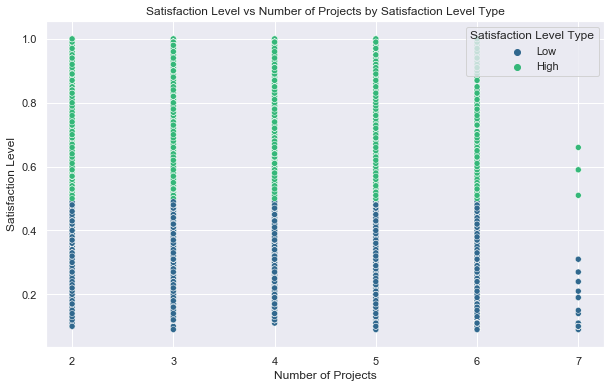

In [28]:
# Plotting scatter plot for satisfaction level vs number of projects, colored by satisfaction level type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_project', y='satisfaction_level', hue='satisfaction_level_type', data=df, palette='viridis')
plt.title('Satisfaction Level vs Number of Projects by Satisfaction Level Type')
plt.xlabel('Number of Projects')
plt.ylabel('Satisfaction Level')
plt.grid(True)
plt.legend(title='Satisfaction Level Type')
plt.show()

**Question:** What did you infer drom the above plot

**Answer:** The employees with 7 projects are not well satisfied as compare to others

Now lets check number of projects for low satisfaction level

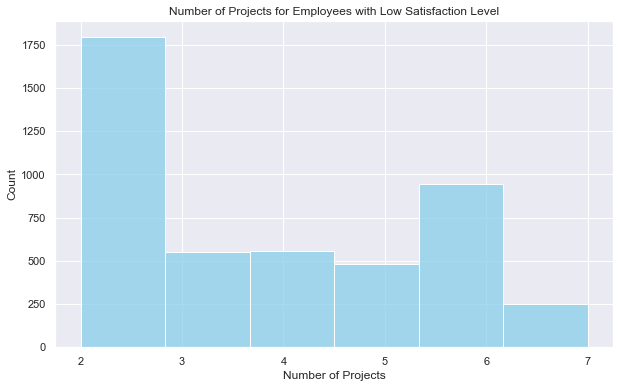

In [29]:
# Write Code Here
# Filtering data for employees with low satisfaction level
low_satisfaction_df = df[df['satisfaction_level'] < 0.5]

# Plotting histogram for number of projects for low satisfaction level employees
plt.figure(figsize=(10, 6))
sns.histplot(low_satisfaction_df['number_project'], bins=6, kde=False, color='skyblue')
plt.title('Number of Projects for Employees with Low Satisfaction Level')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 14: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [30]:
# Defining function to categorize employee type based on number of projects
def categorize_employee_type(num_projects):
    if num_projects == 2:
        return 'Unburdened'
    elif 3 <= num_projects <= 5:
        return 'Satisfactory'
    elif num_projects >= 6:
        return 'Burdened'
    else:
        return 'Unknown'  # Handle any unexpected values or NaNs

# Create new column 'employee_type' based on number of projects
df['employee_type'] = df['number_project'].apply(categorize_employee_type)

# Displaying the first few rows to verify
print(df[['number_project', 'employee_type']].head())

   number_project employee_type
0               2    Unburdened
1               5  Satisfactory
2               7      Burdened
3               5  Satisfactory
4               2    Unburdened


**Task 15: Make a countplot to see which type of employee is leaving**

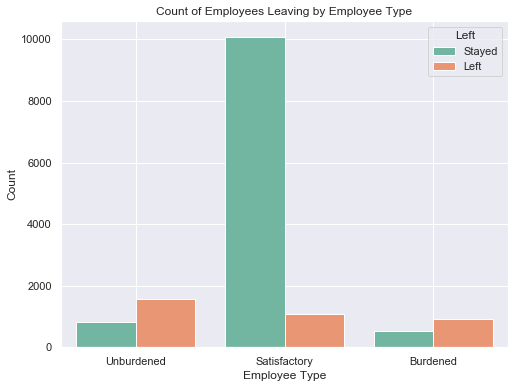

In [31]:
# Write code here
# Plotting countplot to show which type of employee is leaving
plt.figure(figsize=(8, 6))
sns.countplot(x='employee_type', hue='left', data=df, palette='Set2')
plt.title('Count of Employees Leaving by Employee Type')
plt.xlabel('Employee Type')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.grid(True)
plt.show()

### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [32]:
# Write code here
# Defining function to categorize employee type based on number of projects
def categorize_employee_type(num_projects):
    if num_projects == 2:
        return 'Unburdened'
    elif 3 <= num_projects <= 5:
        return 'Satisfactory'
    elif num_projects >= 6:
        return 'Burdened'
    else:
        return 'Unknown'  # Handle any unexpected values or NaNs

# Creating new column 'employee_type' based on number of projects
df['employee_type'] = df['number_project'].apply(categorize_employee_type)

# List of columns used in feature engineering or identified as redundant
redundant_columns = ['number_project', 'satisfaction_level']

# Droping redundant columns
df.drop(columns=redundant_columns, inplace=True)

# Displaying first few rows to verify
print(df.head())

   last_evaluation  average_montly_hours  time_spend_company  Work_accident  \
0             0.53                   157                   3              0   
1             0.86                   262                   6              0   
2             0.88                   272                   4              0   
3             0.87                   223                   5              0   
4             0.52                   159                   3              0   

   left  promotion_last_5years   dept  salary satisfaction_level_type  \
0     1                      0  sales     low                     Low   
1     1                      0  sales  medium                    High   
2     1                      0  sales  medium                     Low   
3     1                      0  sales     low                    High   
4     1                      0  sales     low                     Low   

  employee_type  
0    Unburdened  
1  Satisfactory  
2      Burdened  
3  Satisfactor

# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 16: Do ONE HOT ENCODING of the above mentioned variables**

In [33]:
# Write code here
# Ensure the 'number_project' column exists before applying the function
if 'number_project' in df.columns:
    # Define function to categorize employee type based on number of projects
    def categorize_employee_type(num_projects):
        if num_projects == 2:
            return 'Unburdened'
        elif 3 <= num_projects <= 5:
            return 'Satisfactory'
        elif num_projects >= 6:
            return 'Burdened'
        else:
            return 'Unknown'  # Handle any unexpected values or NaNs

    # Create new column 'employee_type' based on number of projects
    df['employee_type'] = df['number_project'].apply(categorize_employee_type)
else:
    print("The 'number_project' column is missing from the dataset.")

# List of categorical columns for one-hot encoding
categorical_columns = ['dept', 'salary', 'satisfaction_level_type', 'employee_type']

# Ensure all categorical columns exist before one-hot encoding
missing_columns = [col for col in categorical_columns if col not in df.columns]
if missing_columns:
    print(f"The following columns are missing from the dataset and cannot be one-hot encoded: {missing_columns}")
else:
    # Apply one-hot encoding to categorical columns
    df_encoded = pd.get_dummies(df, columns=categorical_columns)

    # Display the first few rows to verify
    print(df_encoded.head())

The 'number_project' column is missing from the dataset.
   last_evaluation  average_montly_hours  time_spend_company  Work_accident  \
0             0.53                   157                   3              0   
1             0.86                   262                   6              0   
2             0.88                   272                   4              0   
3             0.87                   223                   5              0   
4             0.52                   159                   3              0   

   left  promotion_last_5years  dept_IT  dept_RandD  dept_accounting  dept_hr  \
0     1                      0        0           0                0        0   
1     1                      0        0           0                0        0   
2     1                      0        0           0                0        0   
3     1                      0        0           0                0        0   
4     1                      0        0           0            

**Task 17: Creating Independant and Dependant Variables**

In [34]:
# Write code here
# Define the independent variables (X) and dependent variable (y)
X= df_encoded.drop('left', axis=1)
y= df_encoded['left']

**Task 18: Perform Train Test Split with test size 30 percent and random state = 100**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Perform train-test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=100)

In [37]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 23) (10499,)
(4500, 23) (4500,)


**Task 19: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [61]:
# Importing the model from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression

In [62]:
# Making instance and training the model
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=100)
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=100)

In [63]:
# Get predictions
# Make predictions on the test set
y_pred = rf_model.predict(xtest)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

**Precision**

In [64]:
#Write the code to calculate
precision = precision_score(ytest, y_pred)
precision

0.9733700642791552

**Accuracy**

In [65]:
# Write the code to calculate
accuracy = accuracy_score(ytest, y_pred)
accuracy

0.9848888888888889

**Recall**

In [66]:
# Write the code to calculate
recall = recall_score(ytest, y_pred)
recall

0.9645131938125568

**F1-Score**

In [67]:
# Write the code to calculate
f1 = f1_score(ytest, y_pred)
f1

0.9689213893967092

**Classification Report**

In [68]:
#Write the code to calculate
report = classification_report(ytest, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      3401\n           1       0.97      0.96      0.97      1099\n\n    accuracy                           0.98      4500\n   macro avg       0.98      0.98      0.98      4500\nweighted avg       0.98      0.98      0.98      4500\n'

## Logistic Regression

In [69]:
# Create instance and train, random _state=100
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=100, max_iter=1000)
lr_model.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000, random_state=100)

In [72]:
# get the predictions
# Make predictions on the test set
y_pred = lr_model.predict(xtest)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

**Accuracy**

In [73]:
#Write the code here
lr_accuracy= accuracy_score(ytest, y_pred)
lr_accuracy

0.8602222222222222

**Precision**

In [74]:
#Write the code here
lr_precision=precision_score(ytest, y_pred)
lr_precision

0.7290448343079922

**Recall**

In [76]:
#Write the code here
lr_recall=recall_score(ytest, y_pred)
lr_recall

0.6806187443130118

**F1 Score**

In [77]:
#Write the code here
lr_f1_score=f1_score(ytest, y_pred)
lr_f1_score

0.704

**Classification Report**

In [79]:
#Write the code here
classification_report(ytest, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.92      0.91      3401\n           1       0.73      0.68      0.70      1099\n\n    accuracy                           0.86      4500\n   macro avg       0.81      0.80      0.81      4500\nweighted avg       0.86      0.86      0.86      4500\n'

## Ada Boost

In [80]:
#Write the code here to make an instance and train the model with random state =100
# Initialize and train the AdaBoost model
ada_model = AdaBoostClassifier(random_state=100)
ada_model.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=100)

In [81]:
# Get the predictions
pred_clf_adb=ada_model.predict(xtest)
pred_clf_adb

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

**Accuracy**

In [83]:
#Write code here
ab_accuracy= accuracy_score(ytest, y_pred)
ab_accuracy

0.8602222222222222

**Precision**

In [84]:
#Write code here
ab_precision= precision_score(ytest, y_pred)
ab_precision

0.7290448343079922

**Recall**

In [85]:
#Write code here
ab_recall= recall_score(ytest, y_pred)
ab_recall

0.6806187443130118

**F1-Score**

In [87]:
#Write code here
ab_f1_score=f1_score(ytest, y_pred)
ab_f1_score

0.704

**Classification Report**

In [89]:
#Write code here
classification_report(ytest, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.92      0.91      3401\n           1       0.73      0.68      0.70      1099\n\n    accuracy                           0.86      4500\n   macro avg       0.81      0.80      0.81      4500\nweighted avg       0.86      0.86      0.86      4500\n'

## XG Boost

In [90]:
#Write the code here to import the model
!pip install xgboost


In [91]:
from xgboost import XGBClassifier

In [92]:
#Write the code here to make an instance and train the model with random state =100
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=100)
xgb_model.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, ...)

In [94]:
# Get the predictions
pred_clf_xgb= xgb_model.predict(xtest)
pred_clf_xgb

array([0, 0, 1, ..., 0, 0, 0])

**Accuracy**

In [95]:
#Write code here
xgb_accuracy= accuracy_score(ytest, y_pred)
xgb_accuracy

0.8602222222222222

**Precision**

In [96]:
#Write code here
xgb_precision= precision_score(ytest, y_pred)
xgb_precision

0.7290448343079922

**Recall**

In [97]:
#Write code here
xgb_recall= recall_score(ytest, y_pred)
xgb_recall

0.6806187443130118

**F1-Score**

In [99]:
#Write code here
xgb_f1_score=f1_score(ytest, y_pred)
xgb_f1_score

0.704

**Classification Report**

In [100]:
#Write code here
classification_report(ytest, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.92      0.91      3401\n           1       0.73      0.68      0.70      1099\n\n    accuracy                           0.86      4500\n   macro avg       0.81      0.80      0.81      4500\nweighted avg       0.86      0.86      0.86      4500\n'

# Result Comparisons

**Task 20: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [101]:

# Load your dataset
df = pd.read_csv('HR_comma_sep.csv')

# Ensure the required columns exist
required_columns = ['number_project', 'dept', 'salary', 'satisfaction_level']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"The following columns are missing from the dataset and cannot be processed: {missing_columns}")
else:
    # Define function to categorize employee type based on number of projects
    def categorize_employee_type(num_projects):
        if num_projects == 2:
            return 'Unburdened'
        elif 3 <= num_projects <= 5:
            return 'Satisfactory'
        elif num_projects >= 6:
            return 'Burdened'
        else:
            return 'Unknown'  # Handle any unexpected values or NaNs

    # Create new column 'employee_type' based on number of projects
    df['employee_type'] = df['number_project'].apply(categorize_employee_type)

    # Create 'satisfaction_level_type' based on satisfaction levels
    df['satisfaction_level_type'] = df['satisfaction_level'].apply(lambda x: 'High' if x >= 0.5 else 'Low')

    # List of categorical columns for one-hot encoding
    categorical_columns = ['dept', 'salary', 'satisfaction_level_type', 'employee_type']

    # Apply one-hot encoding to categorical columns
    df_encoded = pd.get_dummies(df, columns=categorical_columns)

    # Define the independent variables (X) and dependent variable (y)
    X = df_encoded.drop('left', axis=1)
    y = df_encoded['left']

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

    # Initialize models
    models = {
        "Random Forest": RandomForestClassifier(random_state=100),
        "Logistic Regression": LogisticRegression(random_state=100, max_iter=1000),
        "AdaBoost": AdaBoostClassifier(random_state=100),
        "XGBoost": XGBClassifier(random_state=100)
    }

    # Dictionary to store the results
    results = []

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        # Append results to the dictionary
        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1
        })

    # Create a DataFrame to display the results
    results_df = pd.DataFrame(results)



C:\Users\Tech sign\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [102]:
# Print the results DataFrame
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.991778   0.991667  0.974522  0.983020
1  Logistic Regression  0.883111   0.770538  0.742493  0.756256
2             AdaBoost  0.958889   0.914701  0.917197  0.915947
3              XGBoost  0.989556   0.987941  0.969063  0.978411


**Task 21: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

Answer: 

The model with the best overall scores is the Random Forest classifier, which achieved the highest accuracy, precision, recall, and F1-score.To further improve the performance of the Random Forest model, we can apply hyperparameter tuning. This process involves searching for the optimal combination of hyperparameters that can improve the model's performance.But here we see that we already have highest accuracy so there is no need for this.